# Airbnb

In [1]:
# import the pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.tsa.stattools import kpss as KPSS
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox as box
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools
from statsmodels.tsa.stattools import arma_order_select_ic as ORDER
from plotnine import * 
from statsmodels.tsa.api import ExponentialSmoothing as es
import statsmodels.formula.api as smf
import calendar
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor

c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
c:\Users\Olivia\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
c:\Users\Olivia\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
c:\Users\Olivia\Anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
# Dataset
df = pd.read_csv('dfc.csv')
df.head()

,date,index,id,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,...,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,lm_review,month_review
0,2015-05-01,0,109,708,Amazing bright apartment parkfront,521,Paolo,NaN,Culver City,33.982095,...,146,7,1,2011-08-15,0.00,1,274.0,los_angeles_2015_05_listings.csv,NaN,NaN
1,2015-07-01,1,109,5637,Amazing bright apartment parkfront,521,Paolo,NaN,Culver City,33.982095,...,85,7,1,2011-08-15,0.02,1,336.0,los_angeles_2015_07_listings.csv,1.0,0.0
2,2015-09-01,2,109,1977,Amazing bright apartment parkfront,521,Paolo,NaN,Culver City,33.982095,...,112,7,1,2011-08-15,0.02,1,283.0,los_angeles_2015_09_listings.csv,1.0,0.0
3,2015-11-01,3,109,2106,Amazing bright apartment parkfront,521,Paolo,NaN,Culver City,33.982095,...,111,7,1,2011-08-15,0.02,1,348.0,los_angeles_2015_11_listings.csv,1.0,0.0
4,2016-01-01,4,109,2378,Amazing bright apartment parkfront,521,Paolo,NaN,Culver City,33.982095,...,117,7,1,2011-08-15,0.02,1,272.0,los_angeles_2016_01_listings.csv,1.0,0.0


# Data preprocess

In [3]:
df['Date'] = pd.to_datetime(df['date'] )
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YM'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

df=df.loc[df['Date']>'2018-03-01',:]
df.loc[df['Date']>='2020-03-01','covid']=1
df.loc[df['Date']<'2020-03-01','covid']=0
df['drop'] = 0 
df.loc[df['Date']=='2019-11-01','drop'] = 1
df.loc[df['Date']=='2019-12-01','drop'] = 1
df=df.dropna(subset=['month_review'])

df.head()

,date,index,id,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,...,availability_365,Scrape File,lm_review,month_review,Date,Year,Month,YM,covid,drop
12,2018-04-01,12,109,0,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.982095,...,0.0,los_angeles_2018_04_listings.csv,2.0,0.0,2018-04-01,2018,4,2018-04,0.0,0
13,2018-05-01,13,109,0,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.982095,...,25.0,los_angeles_2018_05_listings.csv,2.0,0.0,2018-05-01,2018,5,2018-05,0.0,0
14,2018-06-01,14,109,0,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.982095,...,52.0,los_angeles_2018_06_listings.csv,2.0,0.0,2018-06-01,2018,6,2018-06,0.0,0
15,2018-07-01,15,109,0,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.982095,...,82.0,los_angeles_2018_07_listings.csv,2.0,0.0,2018-07-01,2018,7,2018-07,0.0,0
16,2018-08-01,16,109,0,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.982095,...,114.0,los_angeles_2018_08_listings.csv,2.0,0.0,2018-08-01,2018,8,2018-08,0.0,0


In [4]:
df.tail()

,date,index,id,Unnamed: 0,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,...,availability_365,Scrape File,lm_review,month_review,Date,Year,Month,YM,covid,drop
1632919,2021-01-01,1632919,47028232,31489,Bdrm with private ba 2 /24hrAC/Smart TV,311157064,Liyun,Unincorporated Areas,Rowland Heights,33.98093,...,364.0,los_angeles_2021_01_listings.csv,0.0,0.0,2021-01-01,2021,1,2021-01,1.0,0
1632921,2021-01-01,1632921,47028235,31490,Private Room in Perfect Walking Location near ...,358867814,Christopher,City of Los Angeles,Westwood,34.06041,...,7.0,los_angeles_2021_01_listings.csv,0.0,0.0,2021-01-01,2021,1,2021-01,1.0,0
1632923,2021-01-01,1632923,47028602,31491,Peaceful Private Room - Westwood & Beverly Hills,358867814,Christopher,City of Los Angeles,Westwood,34.05827,...,43.0,los_angeles_2021_01_listings.csv,0.0,0.0,2021-01-01,2021,1,2021-01,1.0,0
1632925,2021-01-01,1632925,47028999,31492,STYLISH GUESTHOUSE LAX/SOFI STADIUM/BEACH/SPACEX,10150052,Eddie,City of Los Angeles,Gramercy Park,33.95640,...,0.0,los_angeles_2021_01_listings.csv,0.0,4.0,2021-01-01,2021,1,2021-01,1.0,0
1632930,2021-01-01,1632930,47030111,31495,"The best location, Santa Monica, Los Angele, UCLA",350659068,M,City of Los Angeles,Sawtelle,34.04269,...,179.0,los_angeles_2021_01_listings.csv,0.0,0.0,2021-01-01,2021,1,2021-01,1.0,0


In [72]:
df['room_type'].value_counts()

Entire home/apt    801800
Private room       424639
Shared room         48920
Hotel room           3837
Name: room_type, dtype: int64

# Aggregation & feature engineering

In [160]:
dff=df.groupby(['Date','neighbourhood_group','room_type']).agg({'price': 'median', 'minimum_nights': 'median','Month':'min','covid':'min','Year':'min','drop':'min','month_review':'sum'})
dff.tail(15)

price  minimum_nights  Month  \
Date       neighbourhood_group  room_type                                       
2020-12-01 Other Cities         Shared room       40.0             1.0     12   
           Unincorporated Areas Entire home/apt  149.0             2.0     12   
                                Private room      53.0             2.0     12   
                                Shared room       40.0             3.0     12   
2021-01-01 City of Los Angeles  Entire home/apt  140.0            30.0      1   
                                Hotel room        90.0             1.0      1   
                                Private room      68.0            30.0      1   
                                Shared room       30.0            30.0      1   
           Other Cities         Entire home/apt  150.0             3.0      1   
                                Hotel room        86.0             1.0      1   
                                Private room      65.0             2.0      1   
                                Shared room       38.5             1.0      1   
           Unincorporated Areas Entire home/apt  150.0             2.0      1   
                                Private room      52.5             2.0      1   
                                Shared room       35.5             2.0      1   

                                                 covid  Year  drop  \
Date       neighbourhood_group  room_type                            
2020-12-01 Other Cities         Shared room        1.0  2020     0   
           Unincorporated Areas Entire home/apt    1.0  2020     0   
                                Private room       1.0  2020     0   
                                Shared room        1.0  2020     0   
2021-01-01 City of Los Angeles  Entire home/apt    1.0  2021     0   
                                Hotel room         1.0  2021     0   
                                Private room       1.0  2021     0   
                                Shared room        1.0  2021     0   
           Other Cities         Entire home/apt    1.0  2021     0   
                                Hotel room         1.0  2021     0   
                                Private room       1.0  2021     0   
                                Shared room        1.0  2021     0   
           Unincorporated Areas Entire home/apt    1.0  2021     0   
                                Private room       1.0  2021     0   
                                Shared room        1.0  2021     0   

                                                 month_review  
Date       neighbourhood_group  room_type                      
2020-12-01 Other Cities         Shared room              72.0  
           Unincorporated Areas Entire home/apt        2710.0  
                                Private room            721.0  
                                Shared room              19.0  
2021-01-01 City of Los Angeles  Entire home/apt        3729.0  
                                Hotel room               28.0  
                                Private room            599.0  
                                Shared room              78.0  
           Other Cities         Entire home/apt        4006.0  
                                Hotel room                8.0  
                                Private room           1170.0  
                                Shared room              34.0  
           Unincorporated Areas Entire home/apt        1136.0  
                                Private room            289.0  
                                Shared room              14.0

In [161]:
dff.reset_index(inplace=True)
dff.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review
0,2018-04-01,City of Los Angeles,Entire home/apt,145.0,2.0,4,0.0,2018,0,28140.0
1,2018-04-01,City of Los Angeles,Private room,70.0,1.0,4,0.0,2018,0,11364.0
2,2018-04-01,City of Los Angeles,Shared room,31.0,1.0,4,0.0,2018,0,1117.0
3,2018-04-01,Other Cities,Entire home/apt,160.0,2.0,4,0.0,2018,0,10735.0
4,2018-04-01,Other Cities,Private room,65.0,1.0,4,0.0,2018,0,6442.0


In [162]:
dff['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [163]:
# Filter out hotel room due to low market share
dff=dff[~(dff['room_type']=='Hotel room')]

In [165]:
# splitting data into training+validation and testing
trn2=dff.loc[dff['Date']<'2020-08-01',:]
val2=dff.loc[(dff['Date']>='2020-08-01')&(dff['Date']<'2020-11-01'),:]
tst2=dff.loc[dff['Date']>='2020-11-01',:]
val2.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review
277,2020-08-01,City of Los Angeles,Entire home/apt,142.0,7.0,8,1.0,2020,0,12429.0
279,2020-08-01,City of Los Angeles,Private room,70.0,3.0,8,1.0,2020,0,2204.0
280,2020-08-01,City of Los Angeles,Shared room,30.0,30.0,8,1.0,2020,0,230.0
281,2020-08-01,Other Cities,Entire home/apt,150.0,3.0,8,1.0,2020,0,9327.0
283,2020-08-01,Other Cities,Private room,62.0,2.0,8,1.0,2020,0,2792.0


### Room Type Target Encoding

In [166]:
# statistical smoothing(target encoding with smoothing)
c=4;nmid=20;y_avg=trn2['month_review'].median()
y_roomtype=trn2.groupby('room_type')['month_review'].median()
num=trn2.groupby('room_type').size()
y_roomtype_smooth=y_avg+(y_roomtype-y_avg)/(1+np.exp(-(num-nmid)/c))
dff['roomtype_risk']=dff.room_type.map(y_roomtype_smooth)
dff.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review,roomtype_risk
0,2018-04-01,City of Los Angeles,Entire home/apt,145.0,2.0,4,0.0,2018,0,28140.0,8787.499223
1,2018-04-01,City of Los Angeles,Private room,70.0,1.0,4,0.0,2018,0,11364.0,5648.499576
2,2018-04-01,City of Los Angeles,Shared room,31.0,1.0,4,0.0,2018,0,1117.0,175.500192
3,2018-04-01,Other Cities,Entire home/apt,160.0,2.0,4,0.0,2018,0,10735.0,8787.499223
4,2018-04-01,Other Cities,Private room,65.0,1.0,4,0.0,2018,0,6442.0,5648.499576


### Neighbourhood Group Target Encoding

In [167]:
# statistical smoothing(target encoding with smoothing)
c=4;nmid=20;y_avg=trn2['month_review'].median()
y_neighbourhood=trn2.groupby('neighbourhood_group')['month_review'].median()
num=trn2.groupby('neighbourhood_group').size()
y_neighbourhood_smooth=y_avg+(y_neighbourhood-y_avg)/(1+np.exp(-(num-nmid)/c))
dff['neighbourhood_risk']=dff.neighbourhood_group.map(y_neighbourhood_smooth)
dff.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review,roomtype_risk,neighbourhood_risk
0,2018-04-01,City of Los Angeles,Entire home/apt,145.0,2.0,4,0.0,2018,0,28140.0,8787.499223,9243.999172
1,2018-04-01,City of Los Angeles,Private room,70.0,1.0,4,0.0,2018,0,11364.0,5648.499576,9243.999172
2,2018-04-01,City of Los Angeles,Shared room,31.0,1.0,4,0.0,2018,0,1117.0,175.500192,9243.999172
3,2018-04-01,Other Cities,Entire home/apt,160.0,2.0,4,0.0,2018,0,10735.0,8787.499223,5746.999565
4,2018-04-01,Other Cities,Private room,65.0,1.0,4,0.0,2018,0,6442.0,5648.499576,5746.999565


In [168]:
# splitting data into training+validation and testing
trn2=dff.loc[dff['Date']<'2020-08-01',:]
val2=dff.loc[(dff['Date']>='2020-08-01')&(dff['Date']<'2020-11-01'),:]
tst2=dff.loc[dff['Date']>='2020-11-01',:]
val2.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review,roomtype_risk,neighbourhood_risk
277,2020-08-01,City of Los Angeles,Entire home/apt,142.0,7.0,8,1.0,2020,0,12429.0,8787.499223,9243.999172
279,2020-08-01,City of Los Angeles,Private room,70.0,3.0,8,1.0,2020,0,2204.0,5648.499576,9243.999172
280,2020-08-01,City of Los Angeles,Shared room,30.0,30.0,8,1.0,2020,0,230.0,175.500192,9243.999172
281,2020-08-01,Other Cities,Entire home/apt,150.0,3.0,8,1.0,2020,0,9327.0,8787.499223,5746.999565
283,2020-08-01,Other Cities,Private room,62.0,2.0,8,1.0,2020,0,2792.0,5648.499576,5746.999565


In [169]:
# after feature selection
trn_x2=trn2[['price', 'minimum_nights','Month', 'covid','Year','roomtype_risk','neighbourhood_risk','drop']]
trn_y2=trn2[['month_review']]
val_x2=val2[['price', 'minimum_nights','Month', 'covid','Year','roomtype_risk','neighbourhood_risk','drop']]
val_y2=val2[['month_review']]
tst_x2=tst2[['price', 'minimum_nights', 'Month', 'covid','Year','roomtype_risk','neighbourhood_risk','drop']]
tst_y2=tst2[['month_review']]
dff_x2=dff[['price', 'minimum_nights', 'Month', 'covid','Year','roomtype_risk','neighbourhood_risk','drop']]
dff_y2=dff[['month_review']]


In [170]:
trnval_x2=pd.concat([trn_x2,val_x2])
trnval_y2=pd.concat([trn_y2,val_y2])
trnval2=pd.concat([trn2,val2])
trnval2.head()

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review,roomtype_risk,neighbourhood_risk
0,2018-04-01,City of Los Angeles,Entire home/apt,145.0,2.0,4,0.0,2018,0,28140.0,8787.499223,9243.999172
1,2018-04-01,City of Los Angeles,Private room,70.0,1.0,4,0.0,2018,0,11364.0,5648.499576,9243.999172
2,2018-04-01,City of Los Angeles,Shared room,31.0,1.0,4,0.0,2018,0,1117.0,175.500192,9243.999172
3,2018-04-01,Other Cities,Entire home/apt,160.0,2.0,4,0.0,2018,0,10735.0,8787.499223,5746.999565
4,2018-04-01,Other Cities,Private room,65.0,1.0,4,0.0,2018,0,6442.0,5648.499576,5746.999565


In [171]:
# trn_x2, val_x2, trn_y2, val_y2 = train_test_split(
# trnval_x2, trnval_y2, test_size=0.33, random_state=42)
# val_x2.head()

In [172]:
def get_paramsList(param_grid):
    """
    Create all possible combinations of params.
    Returns a list of all param names and a list of all param combinations.
    """
    import itertools as it
    allNames = sorted(param_grid)
    combinations = it.product(*(param_grid[Name] for Name in allNames))
    all_params = list(combinations)
    return allNames, all_params

In [173]:
def rmse(y_actual,y_predicted):
    return(((y_actual-y_predicted)**2).mean())**0.5 

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def smape(actual,pred): 
    actual, pred = np.array(actual), np.array(pred)
    return 100/len(actual) * np.sum(2 * np.abs(pred - actual) / (np.abs(actual) + np.abs(pred)))

In [174]:
def modeling_agg(modeltype,all_params,param_names,train_x,train_y,val_x,val_y):  
    result=pd.DataFrame(all_params,columns=param_names)
    row=0
    for i in all_params:
        result.loc[row,'model']=modeltype
        if modeltype=='lgbm':
            params = dict(zip(param_names, i))
            lgb_train = lgb.Dataset(train_x,train_y)
            lgb_valid = lgb.Dataset(val_x,val_y)
            model = lgb.train(params, lgb_train, num_boost_round=500) #num_boost_round: Number of boosting iterations; valid_sets: List of data to be evaluated on during training
            
            y_val = model.predict(val_x)
            y_trn=model.predict(train_x)
        elif modeltype=='xgboost':
            params = dict(zip(param_names, i))
            model = xgb.XGBRegressor(**params)
            model.fit(train_x, train_y)
            
            y_val=model.predict(val_x)
            y_trn=model.predict(train_x)
        elif modeltype=='dt':
            params = dict(zip(param_names, i))
            model = DecisionTreeRegressor(**params)
            model.fit(train_x, train_y)

            y_val=model.predict(val_x)
            y_trn=model.predict(train_x)

        # train_x['y_pred']=y_trn
        # calculate training MAPE between observed and predicted values 
        y_true = train_y.values
        y_pred = y_trn.reshape(len(y_trn),1)
      
        mape0 = mape(y_true, y_pred)
        smape0 = smape(y_true, y_pred)
        rmse0 = rmse(y_true, y_pred)
        result.loc[row,'mape_trn']=mape0
        result.loc[row,'smape_trn']=smape0
        result.loc[row,'rmse_trn']=rmse0

        
        # calculate validation MAPE between observed and predicted values 
        y_true = val_y.values
        y_pred = y_val.reshape(len(y_val),1)
        mape1 = mape(y_true, y_pred)
        smape1 = smape(y_true, y_pred)
        rmse1 = rmse(y_true, y_pred)
        result.loc[row,'mape_tst']=mape1
        result.loc[row,'smape_tst']=smape1
        result.loc[row,'rmse_tst']=rmse1
        row+=1
    return y_trn,y_val,result

# Modeling

In [175]:
# xgboost
param_grid = {
    'learning_rate': [0.05,0.08,0.1,0.2],#
    'max_depth': [5,10,20], #10
    'booster':['gbtree'] # dart
}
param_names, all_params = get_paramsList(param_grid)
y_trn1,y_val1,result1=modeling_agg('xgboost',all_params,param_names,trn_x2,trn_y2,val_x2,val_y2)

c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [176]:
# xgboost result
result1

,booster,learning_rate,max_depth,model,mape_trn,smape_trn,rmse_trn,mape_tst,smape_tst,rmse_tst
0,gbtree,0.05,5,xgboost,83.989119,25.724167,850.155321,82.630907,59.487713,1756.882269
1,gbtree,0.05,10,xgboost,3.811079,3.803239,367.692932,73.488946,46.740288,1879.140404
2,gbtree,0.05,20,xgboost,2.928834,2.959370,368.078627,71.721205,47.046614,1886.981620
3,gbtree,0.08,5,xgboost,117.168442,28.620351,551.308764,230.895016,74.558875,1904.374969
4,gbtree,0.08,10,xgboost,0.972005,0.969538,82.843930,81.516429,49.207595,2114.503472
5,gbtree,0.08,20,xgboost,0.564381,0.565356,76.424922,79.452509,49.194320,2107.600067
6,gbtree,0.10,5,xgboost,103.956409,28.347392,411.115383,414.249417,79.754143,2056.733304
7,gbtree,0.10,10,xgboost,0.418934,0.418299,29.454432,81.749647,49.188571,2111.033050
8,gbtree,0.10,20,xgboost,0.190090,0.190153,27.858312,81.756626,50.076255,2154.190343
9,gbtree,0.20,5,xgboost,60.590344,21.430162,151.398239,441.989109,82.512902,2039.151324


In [104]:
# decision tree
param_grid = {
    'max_depth': [2,3,5,10,20], #10
    'min_samples_split':[2,5,10] # dart
}
param_names, all_params = get_paramsList(param_grid)
y_trn2,y_val2,result2=modeling_agg('dt',all_params,param_names,trn_x2,trn_y2,val_x2,val_y2)

In [105]:
# decision tree result
result2

,max_depth,min_samples_split,model,mape_trn,smape_trn,rmse_trn,mape_tst,smape_tst,rmse_tst
0,2,2,dt,825.769901,80.306539,5524.360962,1413.749541,102.540371,6033.833002
1,2,5,dt,825.769901,80.306539,5524.360962,1413.749541,102.540371,6033.833002
2,2,10,dt,825.769901,80.306539,5524.360962,1413.749541,102.540371,6033.833002
3,3,2,dt,511.583508,59.149200,3583.811404,906.046740,95.327345,6186.711977
4,3,5,dt,511.583508,59.149200,3583.811404,906.046740,95.327345,6186.711977
5,3,10,dt,511.583508,59.149200,3583.811404,906.046740,95.327345,6186.711977
6,5,2,dt,41.239847,25.094837,1724.985003,102.825337,59.555134,2066.490420
7,5,5,dt,41.849320,25.534365,1736.110504,121.259550,65.028196,3121.200428
8,5,10,dt,47.635439,28.298301,2082.367188,120.833584,67.429059,2690.149854
9,10,2,dt,3.720327,3.493370,257.937544,119.497269,50.685571,3682.534112


In [106]:
#lightgbm
param_grid = {
    'learning_rate': [0.3,0.4,0.5],
    'max_depth': [-1,5],
    'min_data_in_leaf':[3,5],
    'num_leaves': [20,31,35]
}
param_names, all_params = get_paramsList(param_grid)
y_trn3,y_val3,result3=modeling_agg('lgbm',all_params,param_names,trn_x2,trn_y2,val_x2,val_y2)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 8
[LightGBM] [Info] Start training from score 5855.591270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train set: 252, number of used features: 8
[LightGBM] [Info] Start training from score 5855.591270
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 61
[LightGBM] [Info] Number of data points in the train 

In [107]:
# lgbm result
result3

,learning_rate,max_depth,min_data_in_leaf,num_leaves,model,mape_trn,smape_trn,rmse_trn,mape_tst,smape_tst,rmse_tst
0,0.3,-1,3,20,lgbm,5.451221,5.160408,7.232960,856.120009,72.131874,1663.170828
1,0.3,-1,3,31,lgbm,0.653809,0.632821,0.866443,1852.276968,72.723702,1675.147073
2,0.3,-1,3,35,lgbm,0.471002,0.461136,0.444488,1358.062424,69.436638,1500.610623
3,0.3,-1,5,20,lgbm,19.143023,13.523095,25.764656,779.327204,81.750891,1652.926724
4,0.3,-1,5,31,lgbm,7.638861,7.170660,10.844688,963.467750,86.510051,1447.914573
5,0.3,-1,5,35,lgbm,2.929658,2.911677,6.725388,2040.964083,66.854905,1499.584129
6,0.3,5,3,20,lgbm,13.792367,11.521647,33.267150,3954.582881,97.455459,2033.768890
7,0.3,5,3,31,lgbm,8.072309,7.894288,30.143763,1355.644350,93.347984,1892.863449
8,0.3,5,3,35,lgbm,8.072309,7.894288,30.143763,1355.644350,93.347984,1892.863449
9,0.3,5,5,20,lgbm,46.980416,20.270515,89.699842,2307.767402,93.932991,1956.183870


## Select best hyperparameters

In [177]:
# final model-xgboost
model_xgb = xgb.XGBRegressor(learning_rate=0.05, max_depth=20)
model_xgb.fit(trnval_x2, trnval_y2)

y_tst=model_xgb.predict(tst_x2)
y_trn=model_xgb.predict(trnval_x2)
trnval2['yhat_xgboost']=y_trn
tst2['yhat_xgboost']=y_tst
# calculate training MAPE between observed and predicted values 
smape_trn=smape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
smape_tst=smape(tst_y2.values, y_tst.reshape(len(y_tst),1))
mape_trn=mape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
mape_tst=mape(tst_y2.values, y_tst.reshape(len(y_tst),1))
rmse_trn=rmse(trnval_y2.values, y_trn.reshape(len(y_trn),1))
rmse_tst=rmse(tst_y2.values, y_tst.reshape(len(y_tst),1))
print('smape_trnval:',smape_trn,'smape_tst:',smape_tst)
print('mape_trnval:',mape_trn,'mape_tst:',mape_tst)
print('rmse_trnval:',rmse_trn,'rmse_tst:',rmse_tst)

c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


smape_trnval: 3.09620851391627 smape_tst: 56.55121964493017
mape_trnval: 3.0605926265777494 mape_tst: 121.91775208181053
rmse_trnval: 352.9620890082019 rmse_tst: 1930.545695201158


<ipython-input-177-23e171fa6a94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [178]:
# final model-dt
model_dt = DecisionTreeRegressor(max_depth=10, min_samples_split=2)
model_dt.fit(trnval_x2, trnval_y2)

y_tst=model_dt.predict(tst_x2)
y_trn=model_dt.predict(trnval_x2)
trnval2['yhat_dt']=y_trn
tst2['yhat_dt']=y_tst
# calculate training MAPE between observed and predicted values 
smape_trn=smape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
smape_tst=smape(tst_y2.values, y_tst.reshape(len(y_tst),1))
mape_trn=mape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
mape_tst=mape(tst_y2.values, y_tst.reshape(len(y_tst),1))
rmse_trn=rmse(trnval_y2.values, y_trn.reshape(len(y_trn),1))
rmse_tst=rmse(tst_y2.values, y_tst.reshape(len(y_tst),1))
print('smape_trnval:',smape_trn,'smape_tst:',smape_tst)
print('mape_trnval:',mape_trn,'mape_tst:',mape_tst)
print('rmse_trnval:',rmse_trn,'rmse_tst:',rmse_tst)

smape_trnval: 3.8037067794763026 smape_tst: 62.685788138873455
mape_trnval: 4.03593928951432 mape_tst: 144.5442783466948
rmse_trnval: 247.69439146225156 rmse_tst: 2050.3323167197746


<ipython-input-178-1f5432f4ad29>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [179]:
# final model-lgbm
params = {
    'learning_rate': 0.5, 
    'max_depth': -1,
    'min_data_in_leaf': 3,
    'num_leaves': 35
}
lgb_train = lgb.Dataset(trnval_x2, trnval_y2)
model_lgbm = lgb.train(params, lgb_train, num_boost_round=500)

y_tst=model_lgbm.predict(tst_x2)
y_trn=model_lgbm.predict(trnval_x2)
trnval2['yhat_lgbm']=y_trn
tst2['yhat_lgbm']=y_tst
# calculate training MAPE between observed and predicted values 
smape_trn=smape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
smape_tst=smape(tst_y2.values, y_tst.reshape(len(y_tst),1))
mape_trn=mape(trnval_y2.values, y_trn.reshape(len(y_trn),1))
mape_tst=mape(tst_y2.values, y_tst.reshape(len(y_tst),1))
rmse_trn=rmse(trnval_y2.values, y_trn.reshape(len(y_trn),1))
rmse_tst=rmse(tst_y2.values, y_tst.reshape(len(y_tst),1))
print('smape_trnval:',smape_trn,'smape_tst:',smape_tst)
print('mape_trnval:',mape_trn,'mape_tst:',mape_tst)
print('rmse_trnval:',rmse_trn,'rmse_tst:',rmse_tst)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 8
[LightGBM] [Info] Start training from score 5551.025090
smape_trnval: 0.008878513229146 smape_tst: 113.61233872469676
mape_trnval: 0.008881977462418552 mape_tst: 672.89313364582
rmse_trnval: 0.011073005721580627 rmse_tst: 2577.040839602894


<ipython-input-179-4730bf696aac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [180]:
whole=pd.concat([trnval2,tst2])

<ipython-input-181-15040f1a66d4>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


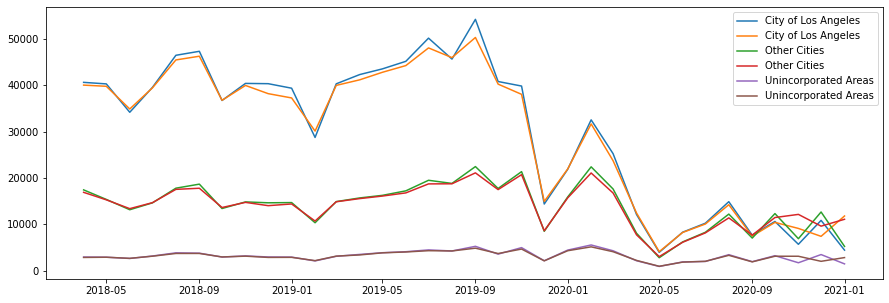

In [181]:
# xgboost fitting plot
plt.figure(figsize=(15,5))
ng = ['City of Los Angeles','Other Cities','Unincorporated Areas']
df_rt=whole.groupby(['Date','neighbourhood_group'])['month_review','yhat_xgboost'].sum()
df_rt = df_rt.reset_index()
for i in ng:
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'month_review'],label=i)
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'yhat_xgboost'],label=i)
    plt.legend()

<ipython-input-182-0b54b98b237f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


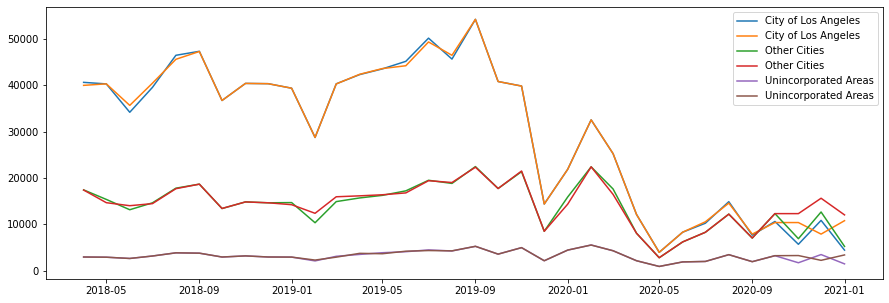

In [182]:
# decision tree fitting plot
plt.figure(figsize=(15,5))
ng = ['City of Los Angeles','Other Cities','Unincorporated Areas']
df_rt=whole.groupby(['Date','neighbourhood_group'])['month_review','yhat_dt'].sum()
df_rt = df_rt.reset_index()
for i in ng:
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'month_review'],label=i)
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'yhat_dt'],label=i)
    plt.legend()

<ipython-input-183-50e0cc7f06c3>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


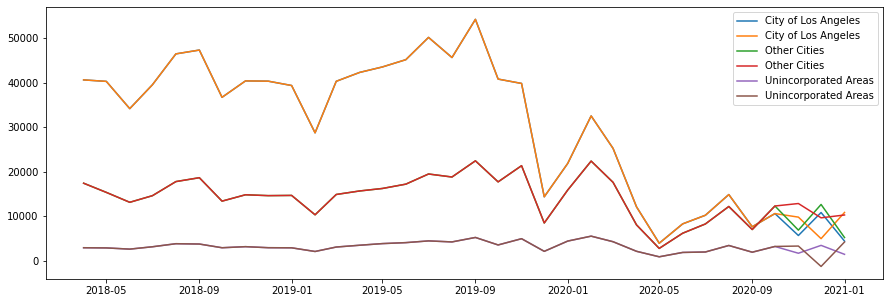

In [183]:
# lgbm fitting plot
plt.figure(figsize=(15,5))
ng = ['City of Los Angeles','Other Cities','Unincorporated Areas']
df_rt=whole.groupby(['Date','neighbourhood_group'])['month_review','yhat_lgbm'].sum()
df_rt = df_rt.reset_index()
for i in ng:
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'month_review'],label=i)
    plt.plot(df_rt.loc[df_rt['neighbourhood_group']==i,'Date'],df_rt.loc[df_rt['neighbourhood_group']==i,'yhat_lgbm'],label=i)
    plt.legend()

# Prediction

In [184]:
pred_feature=pd.read_csv('predicted_feature.csv')
pred_feature=pred_feature.loc[(pred_feature['Date']>'2021-01-01')&(pred_feature['Date']<'2022-01-01')]
pred_feature

,Date,price,minimum_nights,room_type,neighbourhood_group
34,2021-02-01,52.083002,1.949565,Private room,Unincorporated Areas
35,2021-03-01,52.103583,1.902242,Private room,Unincorporated Areas
36,2021-04-01,52.152457,2.798643,Private room,Unincorporated Areas
37,2021-05-01,52.812521,2.749543,Private room,Unincorporated Areas
38,2021-06-01,52.452845,2.703712,Private room,Unincorporated Areas
...,...,...,...,...,...
544,2021-08-01,149.792258,3.574379,Entire home/apt,Other Cities
545,2021-09-01,148.358198,3.552616,Entire home/apt,Other Cities
546,2021-10-01,148.292279,3.531692,Entire home/apt,Other Cities
547,2021-11-01,147.981487,3.511435,Entire home/apt,Other Cities


In [185]:
pred_feature['room_type'].unique()

array(['Private room', 'Shared room', 'Entire home/apt'], dtype=object)

In [186]:
pred_feature['Date']=pd.to_datetime(pred_feature['Date'])
pred_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 34 to 548
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 99 non-null     datetime64[ns]
 1   price                99 non-null     float64       
 2   minimum_nights       99 non-null     float64       
 3   room_type            99 non-null     object        
 4   neighbourhood_group  99 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 4.6+ KB


In [188]:
future=dff.loc[(dff['Date']>='2020-02-01')&(dff['Date']<='2020-12-01')&(dff['room_type']!='Hotel room'),:]

future['Year']=2021
future['Date'] = future['Date'].apply(lambda x: x.replace(year = x.year + 1))
future['covid']=1
future.loc[future['Date']>='2021-03-01','covid']=0
future['price']=np.nan
future['minimum_nights']=np.nan
future['month_review']=np.nan
future=future.merge(pred_feature,how='left',on=['Date','room_type','neighbourhood_group'])
future['price']=future['price_y']
future['minimum_nights']=future['minimum_nights_y']
future=future[['Date','neighbourhood_group','room_type','price','minimum_nights','Month','covid','Year','month_review',
               'drop','roomtype_risk','neighbourhood_risk']]
future


<ipython-input-188-70737c48f0e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-188-70737c48f0e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-188-70737c48f0e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-188-70737c48f

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,month_review,drop,roomtype_risk,neighbourhood_risk
0,2021-02-01,City of Los Angeles,Entire home/apt,142.003177,25.706658,2,1,2021,NaN,0,8787.499223,9243.999172
1,2021-02-01,City of Los Angeles,Private room,67.999074,25.954153,2,1,2021,NaN,0,5648.499576,9243.999172
2,2021-02-01,City of Los Angeles,Shared room,29.463678,12.932264,2,1,2021,NaN,0,175.500192,9243.999172
3,2021-02-01,Other Cities,Entire home/apt,152.334917,2.977577,2,1,2021,NaN,0,8787.499223,5746.999565
4,2021-02-01,Other Cities,Private room,65.763497,1.947537,2,1,2021,NaN,0,5648.499576,5746.999565
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2021-12-01,Other Cities,Private room,71.987996,2.485271,12,0,2021,NaN,0,5648.499576,5746.999565
95,2021-12-01,Other Cities,Shared room,38.929659,1.000000,12,0,2021,NaN,0,175.500192,5746.999565
96,2021-12-01,Unincorporated Areas,Entire home/apt,149.762431,2.000000,12,0,2021,NaN,0,8787.499223,1094.000089
97,2021-12-01,Unincorporated Areas,Private room,51.450011,2.480387,12,0,2021,NaN,0,5648.499576,1094.000089


In [203]:
# final model-xgboost
model_xgb2 = xgb.XGBRegressor(learning_rate=0.05, max_depth=20)
model_xgb2.fit(dff_x2, dff_y2)

# y_tst=model_dt.predict()
y_trn=model_xgb2.predict(dff_x2)
dff['fitted_xgboost']=y_trn
# calculate training MAPE between observed and predicted values 
smape_trn=smape(dff_y2.values, y_trn.reshape(len(y_trn),1))
# smape_tst=smape(tst_y.values, y_tst)
mape_trn=mape(dff_y2.values, y_trn.reshape(len(y_trn),1))
# mape_tst=smape(tst_y.values, y_tst)
rmse_trn=rmse(dff_y2.values, y_trn.reshape(len(y_trn),1))
print('smape:',smape_trn)
print('mape:',mape_trn)
print('rmse:',rmse_trn)

c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


smape: 3.1096628023491935
mape: 3.0690927031813766
rmse: 342.87325057002766


In [204]:
future['month_review']=model_xgb2.predict(future[['price', 'minimum_nights','Month', 'covid','Year','roomtype_risk','neighbourhood_risk','drop']])
future

c:\Users\Olivia\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,month_review,drop,roomtype_risk,neighbourhood_risk
0,2021-02-01,City of Los Angeles,Entire home/apt,142.003177,25.706658,2,1,2021,4854.537598,0,8787.499223,9243.999172
1,2021-02-01,City of Los Angeles,Private room,67.999074,25.954153,2,1,2021,1387.676514,0,5648.499576,9243.999172
2,2021-02-01,City of Los Angeles,Shared room,29.463678,12.932264,2,1,2021,442.852173,0,175.500192,9243.999172
3,2021-02-01,Other Cities,Entire home/apt,152.334917,2.977577,2,1,2021,4472.079590,0,8787.499223,5746.999565
4,2021-02-01,Other Cities,Private room,65.763497,1.947537,2,1,2021,2096.285156,0,5648.499576,5746.999565
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2021-12-01,Other Cities,Private room,71.987996,2.485271,12,0,2021,6401.318848,0,5648.499576,5746.999565
95,2021-12-01,Other Cities,Shared room,38.929659,1.000000,12,0,2021,147.058441,0,175.500192,5746.999565
96,2021-12-01,Unincorporated Areas,Entire home/apt,149.762431,2.000000,12,0,2021,1410.791748,0,8787.499223,1094.000089
97,2021-12-01,Unincorporated Areas,Private room,51.450011,2.480387,12,0,2021,625.232544,0,5648.499576,1094.000089


In [207]:
df_whole=pd.concat([dff,future])
df_whole

,Date,neighbourhood_group,room_type,price,minimum_nights,Month,covid,Year,drop,month_review,roomtype_risk,neighbourhood_risk,fitted_xgboost
0,2018-04-01,City of Los Angeles,Entire home/apt,145.000000,2.000000,4,0.0,2018,0,28140.000000,8787.499223,9243.999172,28027.957031
1,2018-04-01,City of Los Angeles,Private room,70.000000,1.000000,4,0.0,2018,0,11364.000000,5648.499576,9243.999172,11026.495117
2,2018-04-01,City of Los Angeles,Shared room,31.000000,1.000000,4,0.0,2018,0,1117.000000,175.500192,9243.999172,1093.368286
3,2018-04-01,Other Cities,Entire home/apt,160.000000,2.000000,4,0.0,2018,0,10735.000000,8787.499223,5746.999565,10372.306641
4,2018-04-01,Other Cities,Private room,65.000000,1.000000,4,0.0,2018,0,6442.000000,5648.499576,5746.999565,6249.818359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2021-12-01,Other Cities,Private room,71.987996,2.485271,12,0.0,2021,0,6401.318848,5648.499576,5746.999565,NaN
95,2021-12-01,Other Cities,Shared room,38.929659,1.000000,12,0.0,2021,0,147.058441,175.500192,5746.999565,NaN
96,2021-12-01,Unincorporated Areas,Entire home/apt,149.762431,2.000000,12,0.0,2021,0,1410.791748,8787.499223,1094.000089,NaN
97,2021-12-01,Unincorporated Areas,Private room,51.450011,2.480387,12,0.0,2021,0,625.232544,5648.499576,1094.000089,NaN


<ipython-input-209-dd61662cf359>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


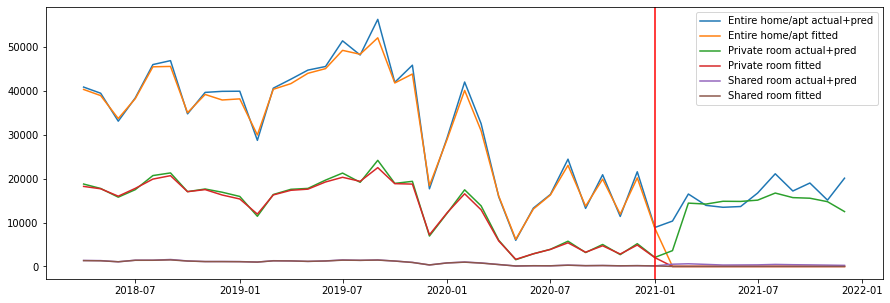

In [209]:
# by room type
plt.figure(figsize=(15,5))
df_whole_rt = df_whole.groupby(['Date','room_type'])['month_review','fitted_xgboost'].sum()
df_whole_rt = df_whole_rt.reset_index()

rt = ['Entire home/apt','Private room','Shared room']
for i in rt:
    plt.plot(df_whole_rt.loc[df_whole_rt['room_type']==i,'Date'],df_whole_rt.loc[df_whole_rt['room_type']==i,'month_review'], label = i+' actual+pred')
    plt.plot(df_whole_rt.loc[df_whole_rt['room_type']==i,'Date'],df_whole_rt.loc[df_whole_rt['room_type']==i,'fitted_xgboost'],label=i+' fitted')
    plt.legend()
plt.axvline(x=pd.to_datetime('2021-01-01'),color='red')

<ipython-input-210-62e78ec9a0b1>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


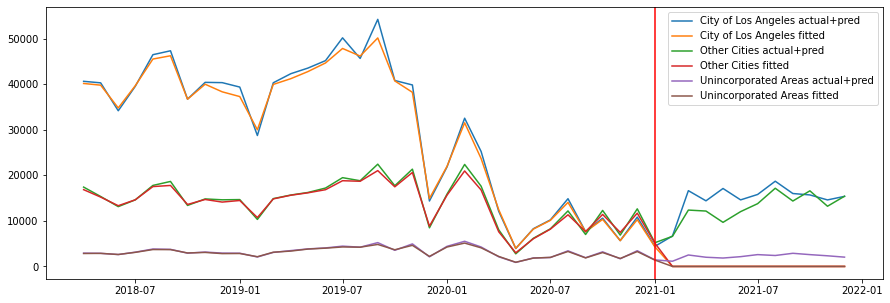

In [210]:
# by neighbor
plt.figure(figsize=(15,5))
df_whole_ng = df_whole.groupby(['Date','neighbourhood_group'])['month_review','fitted_xgboost'].sum()
df_whole_ng = df_whole_ng.reset_index()

for i in ng:
    plt.plot(df_whole_ng.loc[df_whole_ng['neighbourhood_group']==i,'Date'],df_whole_ng.loc[df_whole_ng['neighbourhood_group']==i,'month_review'], label = i+' actual+pred')
    plt.plot(df_whole_ng.loc[df_whole_ng['neighbourhood_group']==i,'Date'],df_whole_ng.loc[df_whole_ng['neighbourhood_group']==i,'fitted_xgboost'],label=i+' fitted')
    plt.legend()
plt.axvline(x=pd.to_datetime('2021-01-01'),color='red')

In [211]:
df_whole.to_csv('df_whole_xgboost2.csv')